In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("D:\Dataset .csv")

In [4]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [5]:
num_rows, num_columns = df.shape
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')

The dataset contains 9551 rows and 21 columns.


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
# Describe the dataset (summary statistics)
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [8]:
# Check for missing values
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


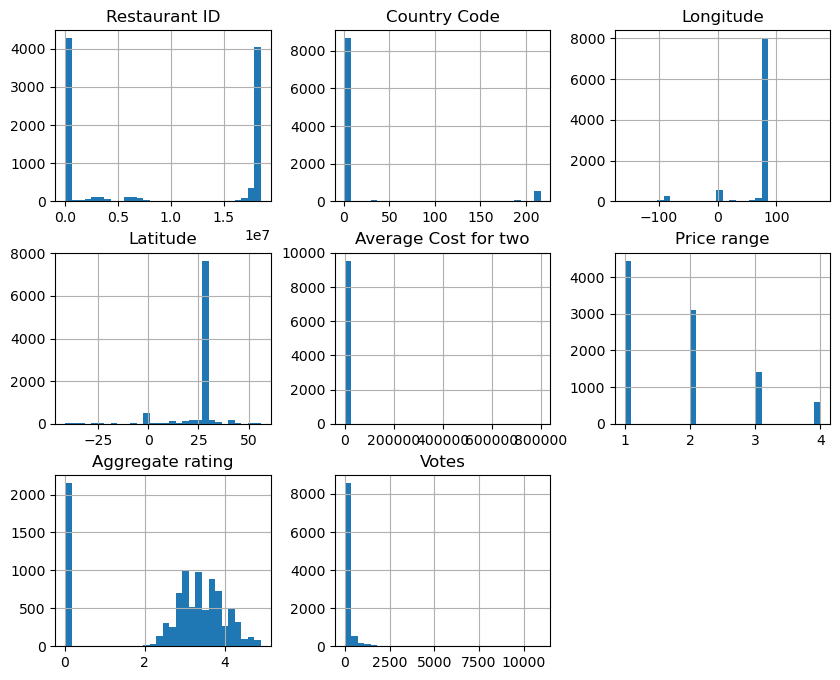

In [10]:
# Visualize the distribution of numeric features
df.hist(bins=30, figsize=(10, 8))
plt.show()

In [11]:
numeric_df = df.select_dtypes(include=[float, int])

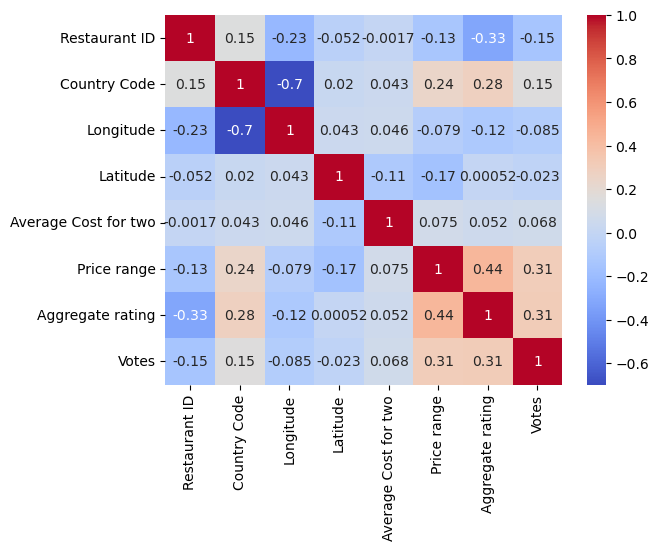

In [12]:
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
df_encoded = pd.get_dummies(df, columns=['Has Table booking','Has Online delivery','Is delivering now'])

In [14]:
df_encoded

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...  Aggregate rating  \
0     14.565443        French, Japanese, Desserts  ...               4.8   
1     14.553708                          Japanese  ...               4.5   
2     14.581404  Seafood, Asian, Filipino, Indian  ...               4.4   
3     14.585318                   Japanese, Sushi  ...               4.9   
4     14.584450                  Japanese, Korean  ...               4.8   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...               4.1   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...               4.2   
9548  41.055817            Italian, World Cuisine  ...               3.7   
9549  41.057979                   Restaurant Cafe  ...               4.0   
9550  40.9

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


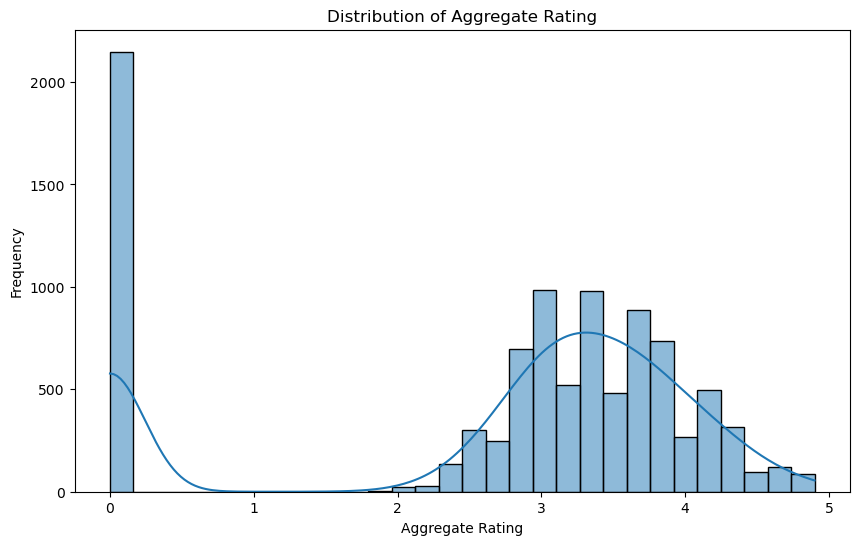

Aggregate Rating Counts:
 Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


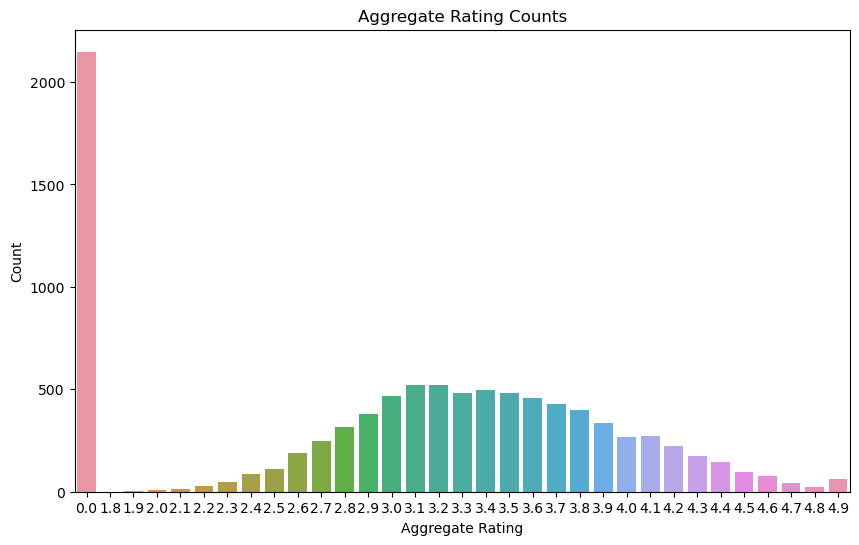

In [15]:
if not pd.api.types.is_numeric_dtype(df['Aggregate rating']):
    df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Step 3: Analyze the distribution of the "Aggregate rating"
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Step 4: Identify any class imbalances
rating_counts = df['Aggregate rating'].value_counts().sort_index()
print("Aggregate Rating Counts:\n", rating_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Aggregate Rating Counts')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


In [16]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:\n", numeric_cols)

Numerical Columns:
 Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [17]:
basic_stats = df[numeric_cols].describe()
print("Basic Statistical Measures:\n", basic_stats)

# Additionally, calculate median and mode as they are not included in describe()
median_values = df[numeric_cols].median()
mode_values = df[numeric_cols].mode().iloc[0]

# Combine the statistics into one DataFrame
extended_stats = basic_stats.T
extended_stats['median'] = median_values
extended_stats['mode'] = mode_values

print("Extended Statistical Measures:\n", extended_stats)

Basic Statistical Measures:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              25

Categorical Columns:
 Country Code     int64
City            object
Cuisines        object
dtype: object


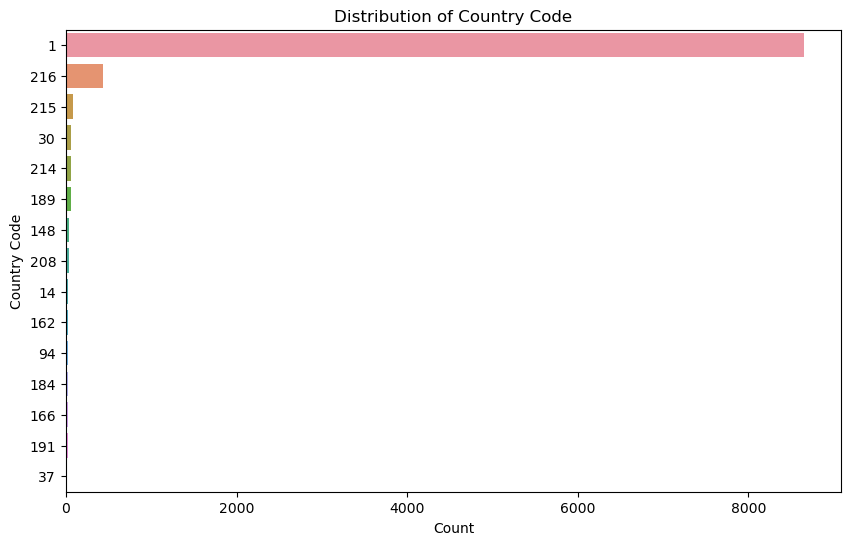

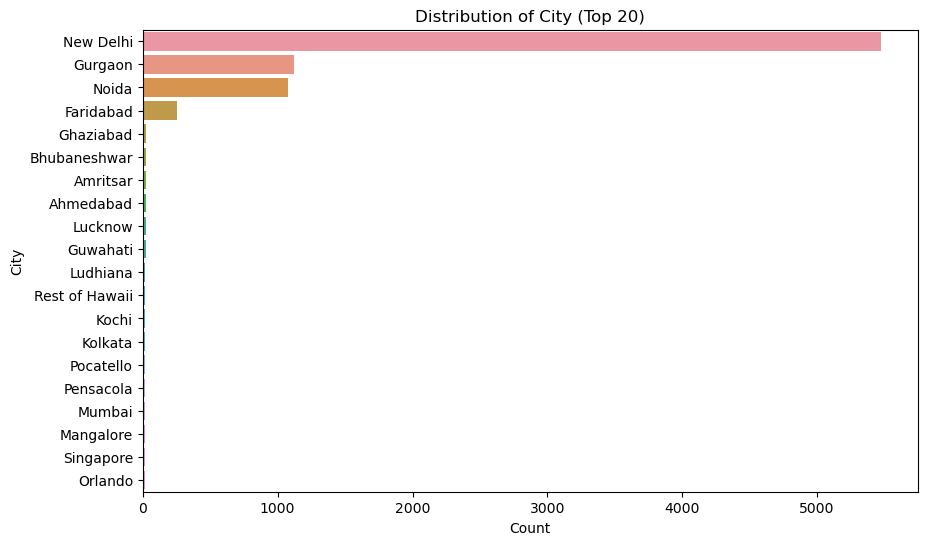

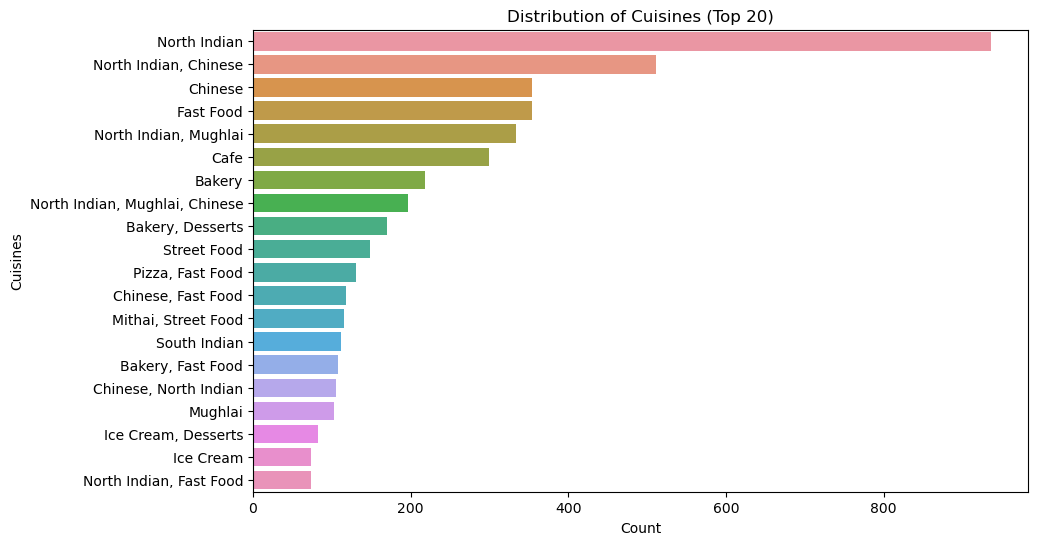

Top 10 Cuisines with the Highest Number of Restaurants:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top 10 Cities with the Highest Number of Restaurants:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [18]:

# Step 2: Ensure the specified columns are categorical
categorical_cols = ['Country Code', 'City', 'Cuisines']
print("Categorical Columns:\n", df[categorical_cols].dtypes)

# Step 3: Explore the distribution of categorical variables
# Plotting the distribution of 'Country Code'
plt.figure(figsize=(10, 6))
sns.countplot(y='Country Code', data=df, order=df['Country Code'].value_counts().index)
plt.title('Distribution of Country Code')
plt.xlabel('Count')
plt.ylabel('Country Code')
plt.show()

# Plotting the distribution of 'City'
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:20])  # Top 20 cities
plt.title('Distribution of City (Top 20)')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

# Plotting the distribution of 'Cuisines'
plt.figure(figsize=(10, 6))
sns.countplot(y='Cuisines', data=df, order=df['Cuisines'].value_counts().index[:20])  # Top 20 cuisines
plt.title('Distribution of Cuisines (Top 20)')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

# Step 4: Identify the top cuisines and cities with the highest number of restaurants
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cities = df['City'].value_counts().head(10)

print("Top 10 Cuisines with the Highest Number of Restaurants:\n", top_cuisines)
print("\nTop 10 Cities with the Highest Number of Restaurants:\n", top_cities)

In [19]:
from folium.plugins import MarkerCluster
import folium

In [20]:
if 'Latitude' not in df.columns or 'Longitude' not in df.columns:
    print("Dataset does not contain Latitude and Longitude information.")
else:
    # Step 3: Create a map using folium
    # Set the initial location to the mean of the latitudes and longitudes
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    restaurant_map = folium.Map(location=map_center, zoom_start=12)

    # Add markers for each restaurant
    marker_cluster = MarkerCluster().add_to(restaurant_map)
    for idx, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['Restaurant Name'] if 'Restaurant Name' in row else 'Restaurant'
        ).add_to(marker_cluster)

    # Save the map to an HTML file
    map_path = 'restaurant_map.html'
    restaurant_map.save(map_path)
    print(f"Map has been saved to {map_path}")

# To display the map in a Jupyter notebook (optional)
# restaurant_map

Map has been saved to restaurant_map.html


Top 10 Cities with the Most Restaurants:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

Top 10 Countries with the Most Restaurants:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


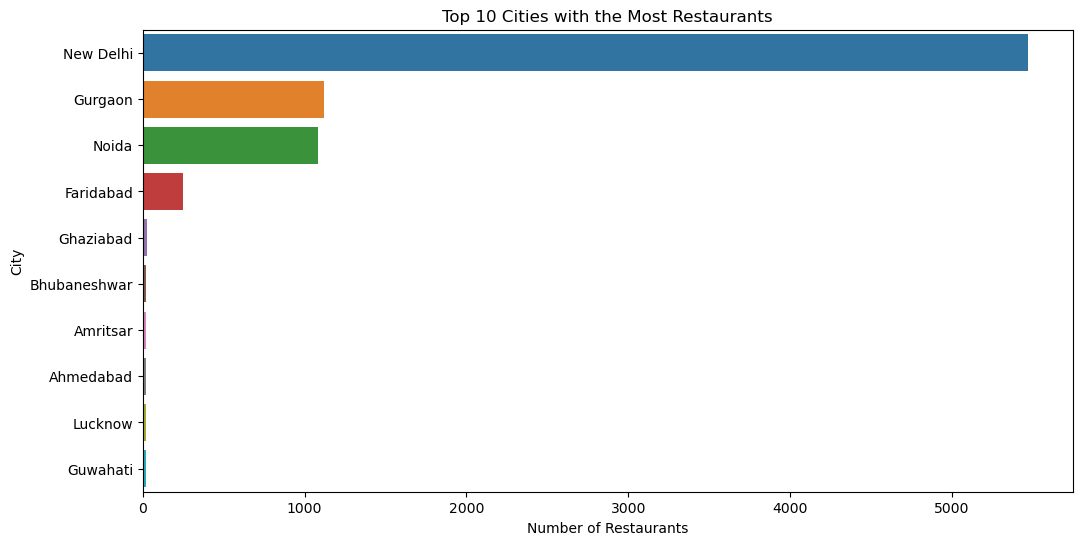

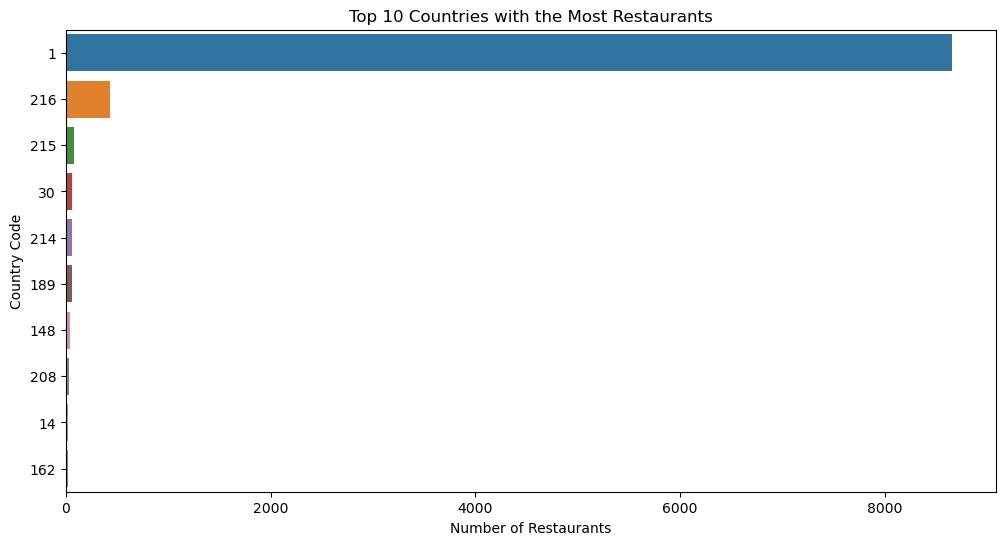

Mean Ratings by City:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

Mean Ratings by Country:
 Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.004378
191    3.870000
Name: Aggregate rating, dtype: float64


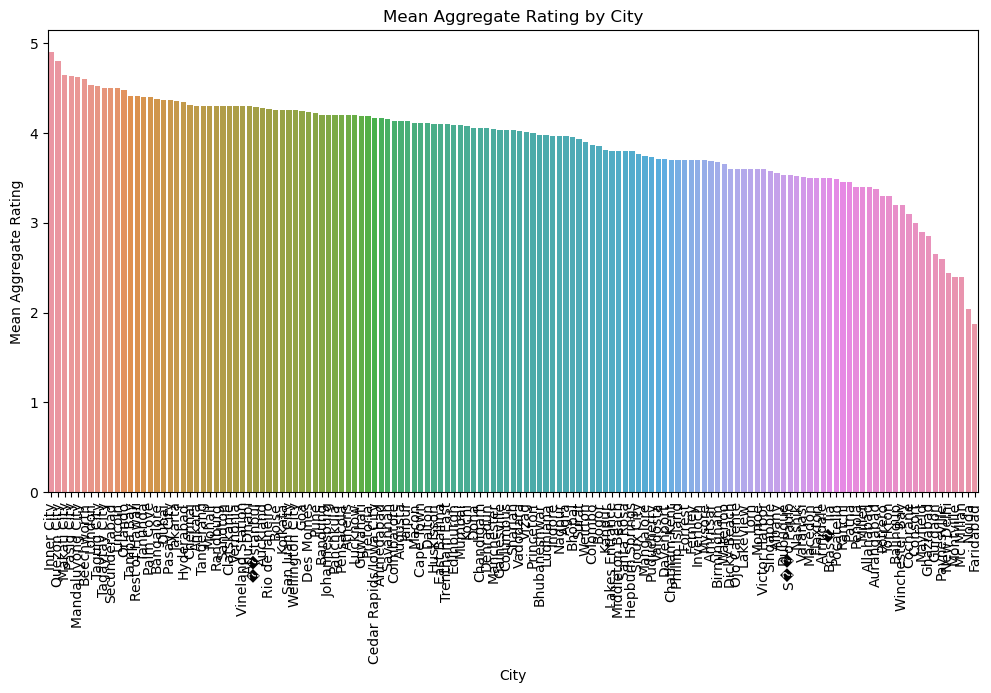

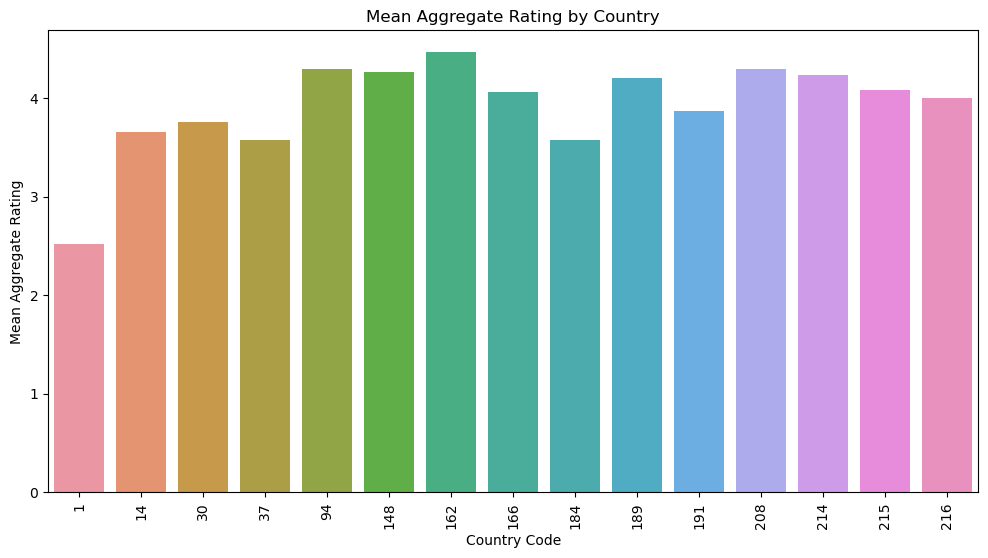

In [21]:

# Step 2: Ensure the dataset contains relevant columns
required_columns = ['City', 'Country Code', 'Aggregate rating']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Dataset does not contain the required column: {col}")

# Step 3: Analyze the distribution of restaurants across different cities and countries
top_cities = df['City'].value_counts().head(10)
top_countries = df['Country Code'].value_counts().head(10)

print("Top 10 Cities with the Most Restaurants:\n", top_cities)
print("\nTop 10 Countries with the Most Restaurants:\n", top_countries)

# Visualize the distribution of restaurants in top cities
plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=df, order=top_cities.index)
plt.title('Top 10 Cities with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

# Visualize the distribution of restaurants in top countries
plt.figure(figsize=(12, 6))
sns.countplot(y='Country Code', data=df, order=top_countries.index)
plt.title('Top 10 Countries with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.show()

# Step 4: Determine if there is any correlation between the restaurant's location and its rating
# Calculate mean rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("Mean Ratings by City:\n", city_ratings.head(10))

# Calculate mean rating for each country
country_ratings = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nMean Ratings by Country:\n", country_ratings.head(10))

# Visualize the correlation between location and rating
plt.figure(figsize=(12, 6))
sns.barplot(x=city_ratings.index, y=city_ratings.values)
plt.title('Mean Aggregate Rating by City')
plt.xlabel('City')
plt.ylabel('Mean Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_ratings.index, y=country_ratings.values)
plt.title('Mean Aggregate Rating by Country')
plt.xlabel('Country Code')
plt.ylabel('Mean Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

In [22]:

# Step 2: Ensure the dataset contains relevant columns
required_columns = ['Has Table booking', 'Has Online delivery']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Dataset does not contain the required column: {col}")

# Step 3: Calculate the percentage of restaurants that offer table booking and online delivery
total_restaurants = len(df)

# Percentage of restaurants offering table booking
table_booking_restaurants = df[df['Has Table booking'] == 'Yes'].shape[0]
table_booking_percentage = (table_booking_restaurants / total_restaurants) * 100

# Percentage of restaurants offering online delivery
online_delivery_restaurants = df[df['Has Online delivery'] == 'Yes'].shape[0]
online_delivery_percentage = (online_delivery_restaurants / total_restaurants) * 100

print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


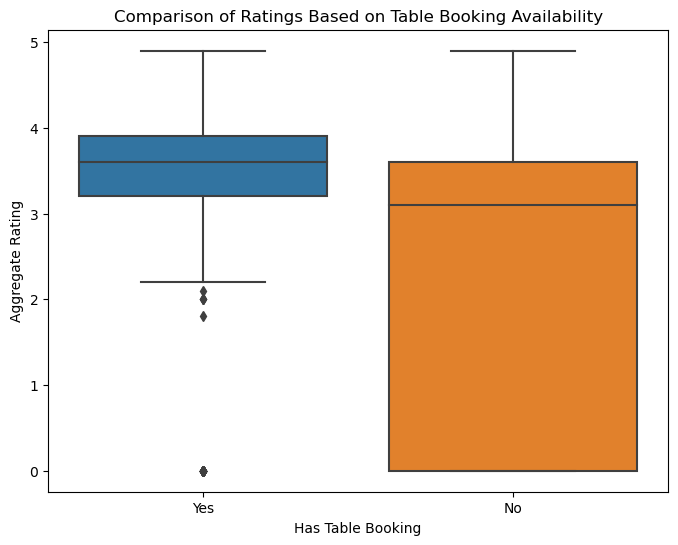

Online Delivery Availability by Price Range (Percentage):
              No Online Delivery  Online delivery
Price range                                     
1                     84.225923        15.774077
2                     58.689367        41.310633
3                     70.809659        29.190341
4                     90.955631         9.044369


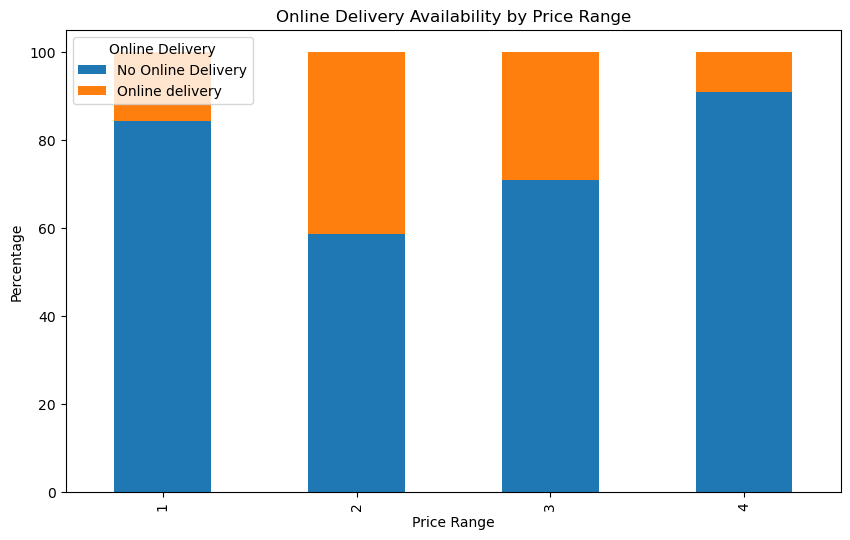

In [23]:
# Step 2: Ensure the dataset contains relevant columns
required_columns = ['Has Table booking', 'Aggregate rating', 'Has Online delivery', 'Price range']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Dataset does not contain the required column: {col}")

# Step 3: Compare average ratings based on table booking
# Convert ratings to numeric, handling any non-numeric values
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Calculate average ratings for restaurants with and without table booking
rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating for restaurants with table booking: {rating_with_table_booking:.2f}")
print(f"Average rating for restaurants without table booking: {rating_without_table_booking:.2f}")

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Comparison of Ratings Based on Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()

# Step 4: Analyze online delivery availability across different price ranges
# Calculate the percentage of restaurants with online delivery for each price range
delivery_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0)
delivery_by_price_range.columns = ['No Online Delivery', 'Online delivery']
delivery_by_price_range_percentage = delivery_by_price_range * 100

print("Online Delivery Availability by Price Range (Percentage):\n", delivery_by_price_range_percentage)

# Plot the availability of online delivery across price ranges
delivery_by_price_range_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Online Delivery')
plt.show()

In [24]:
# Step 2: Ensure the dataset contains the relevant column
if 'Price range' not in df.columns:
    raise ValueError("Dataset does not contain the 'Price range' column.")

# Step 3: Calculate the frequency of each price range
price_range_counts = df['Price range'].value_counts()

# Step 4: Identify the most common price range
most_common_price_range = price_range_counts.idxmax()
most_common_count = price_range_counts.max()

print(f"The most common price range is '{most_common_price_range}' with {most_common_count} restaurants.")

The most common price range is '1' with 4444 restaurants.


In [25]:
# Step 2: Ensure the dataset contains the relevant columns
if 'Price range' not in df.columns or 'Aggregate rating' not in df.columns:
    raise ValueError("Dataset must contain 'Price range' and 'Aggregate rating' columns.")

# Convert ratings to numeric, handling any non-numeric values
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Step 3: Calculate the average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().sort_values(ascending=False)

# Print average ratings for each price range
print("Average Rating for Each Price Range:\n", average_rating_by_price_range)

# Step 4: Identify the price range with the highest average rating
highest_avg_rating_price_range = average_rating_by_price_range.idxmax()
highest_avg_rating = average_rating_by_price_range.max()

print(f"The price range with the highest average rating is '{highest_avg_rating_price_range}' with an average rating of {highest_avg_rating:.2f}.")

Average Rating for Each Price Range:
 Price range
4    3.817918
3    3.683381
2    2.941054
1    1.999887
Name: Aggregate rating, dtype: float64
The price range with the highest average rating is '4' with an average rating of 3.82.


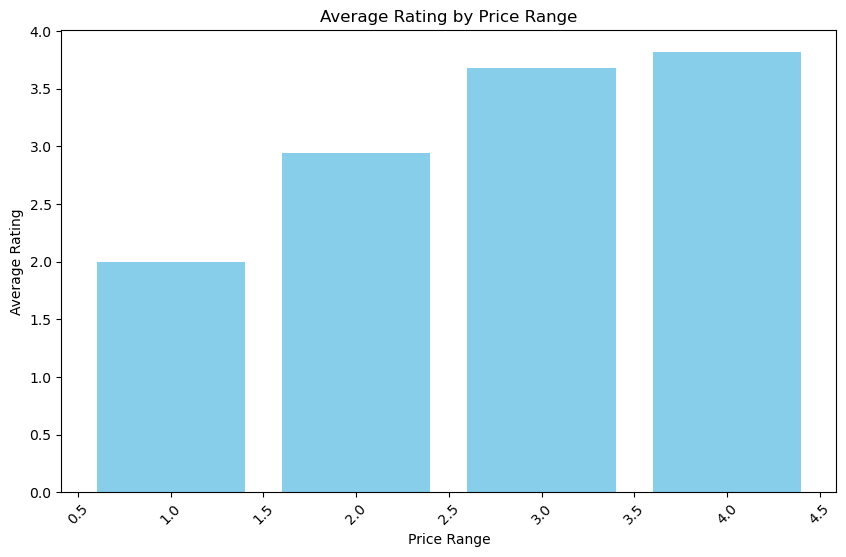

In [26]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Step 3: Calculate the average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().sort_values(ascending=False)

# Step 4: Draw a histogram of average ratings for each price range
plt.figure(figsize=(10, 6))
plt.bar(average_rating_by_price_range.index, average_rating_by_price_range.values, color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [27]:
if 'Restaurant Name' in df.columns:
    df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Extract length of restaurant address
if 'Address' in df.columns:
    df['Address Length'] = df['Address'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

print(df[['Restaurant Name', 'Name Length', 'Address', 'Address Length']].head())

          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


In [28]:
# Ensure the dataset contains the relevant columns
if 'Has Table booking' not in df.columns or 'Has Online delivery' not in df.columns:
    raise ValueError("Dataset must contain 'Has Table booking' and 'Has Online delivery' columns.")

# Create binary features for 'Has Table Booking'
df['Table booking Encoded'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create binary features for 'Has Online Delivery'
df['Online delivery Encoded'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

print(df[['Has Table booking', 'Table booking Encoded', 'Has Online delivery', 'Online delivery Encoded']].head())


  Has Table booking  Table booking Encoded Has Online delivery  \
0               Yes                      1                  No   
1               Yes                      1                  No   
2               Yes                      1                  No   
3                No                      0                  No   
4               Yes                      1                  No   

   Online delivery Encoded  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df.fillna(df.mean(numeric_only=True), inplace=True)

In [31]:
# Encode categorical variables
df['Table booking Encoded'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Online delivery Encoded'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [32]:
# Feature extraction (length of restaurant name and address)
if 'Restaurant Name' in df.columns:
    df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
if 'Address' in df.columns:
    df['Address Length'] = df['Address'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)


In [33]:
# Select features and target variable
features = ['Name Length', 'Address Length', 'Table booking Encoded', 'Online delivery Encoded']
X = df[features]
y = df['Aggregate rating']

Linear Regression Model:
Mean Absolute Error: 1.19
Mean Squared Error: 2.10
R-squared: 0.08


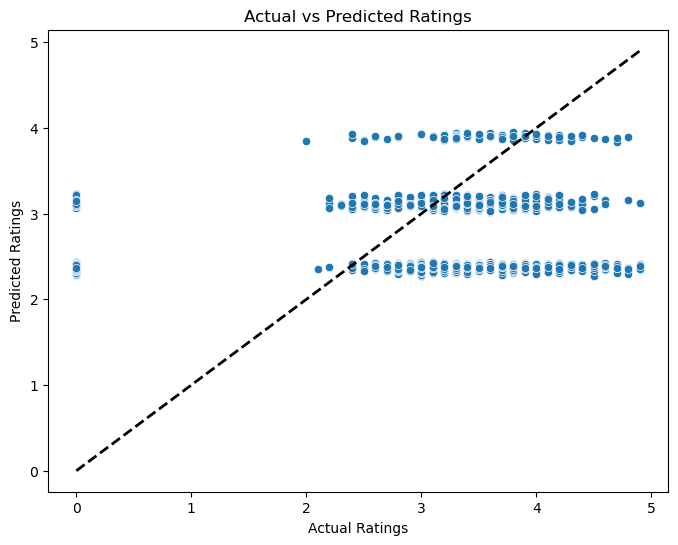

In [34]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot actual vs predicted ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor
# Handle missing values (fill with mean for simplicity)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables
df['Table booking Encoded'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Online delivery Encoded'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


# Feature extraction (length of restaurant name and address)
if 'Restaurant Name' in df.columns:
    df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
if 'Address' in df.columns:
    df['Address Length'] = df['Address'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Select features and target variable
features = ['Name Length', 'Address Length', 'Table booking Encoded', 'Online delivery Encoded']
X = df[features]
y = df['Aggregate rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R-squared': r2
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Mean Absolute Error: {metrics['Mean Absolute Error']:.2f}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
    print(f"R-squared: {metrics['R-squared']:.2f}")


Linear Regression:
Mean Absolute Error: 1.19
Mean Squared Error: 2.10
R-squared: 0.08

Decision Tree Regressor:
Mean Absolute Error: 1.32
Mean Squared Error: 3.00
R-squared: -0.32

Random Forest Regressor:
Mean Absolute Error: 1.25
Mean Squared Error: 2.60
R-squared: -0.14


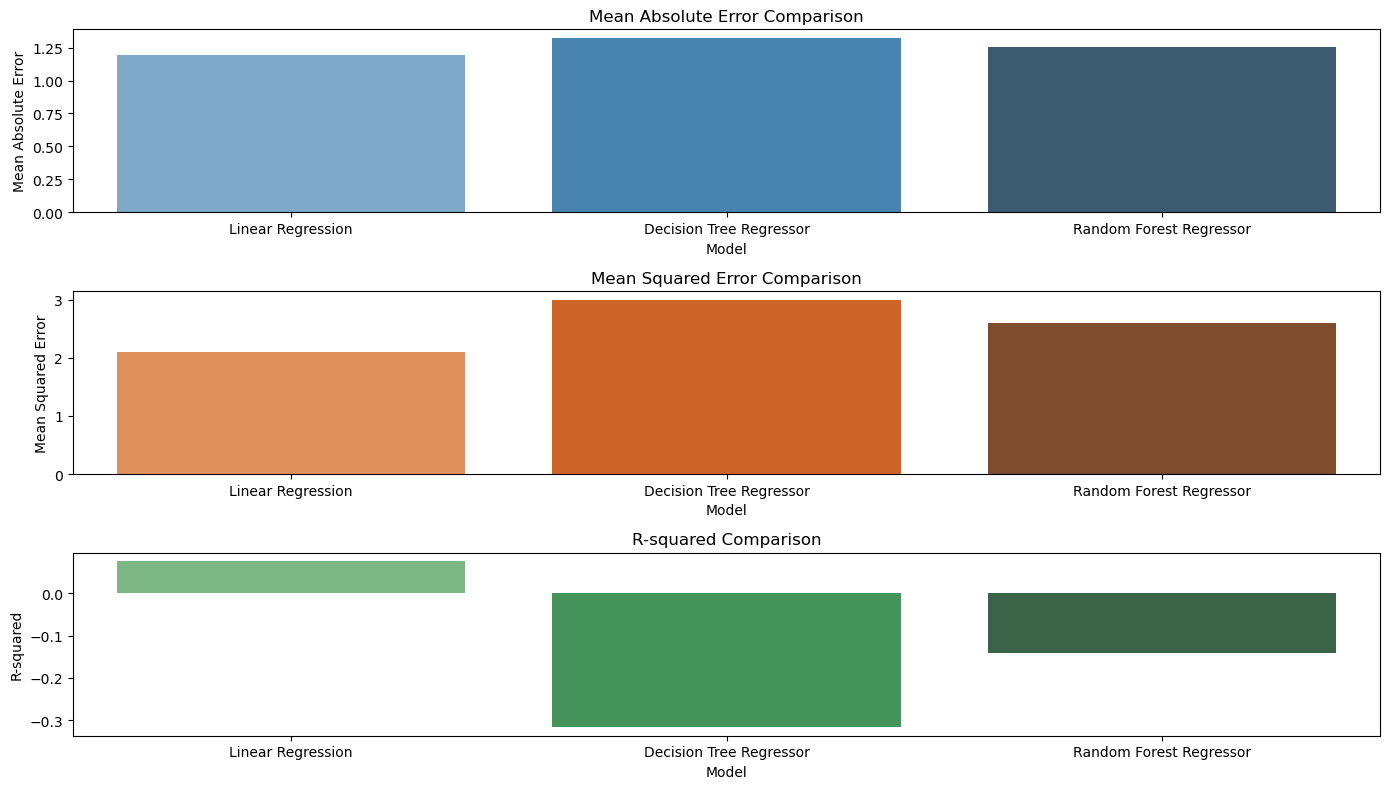

In [36]:
# Prepare data for plotting
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Plot comparison
plt.figure(figsize=(14, 8))

# Plot Mean Absolute Error
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='Mean Absolute Error', data=results_df, palette='Blues_d')
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')

# Plot Mean Squared Error
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='Mean Squared Error', data=results_df, palette='Oranges_d')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')

# Plot R-squared
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='R-squared', data=results_df, palette='Greens_d')
plt.title('R-squared Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

In [37]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Cuisines'] = df['Cuisines'].fillna('Unknown')  # Fill missing cuisines with 'Unknown'
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill other missing values with mean

print(df[['Cuisines', 'Aggregate rating']].head())

                           Cuisines  Aggregate rating
0        French, Japanese, Desserts               4.8
1                          Japanese               4.5
2  Seafood, Asian, Filipino, Indian               4.4
3                   Japanese, Sushi               4.9
4                  Japanese, Korean               4.8


Total Votes by Cuisines:
 Cuisines
North Indian, Mughlai                                             53747
North Indian                                                      46241
North Indian, Chinese                                             42012
Cafe                                                              30657
Chinese                                                           21925
                                                                  ...  
Mithai, South Indian, Chinese, Street Food                            0
Cafe, Tibetan                                                         0
North Indian, South Indian, Chinese, Healthy Food, Bakery             0
North Indian, South Indian, Chinese, Fast Food, Bakery, Mithai        0
Burger, Pizza, Fast Food                                              0
Name: Votes, Length: 1826, dtype: int64


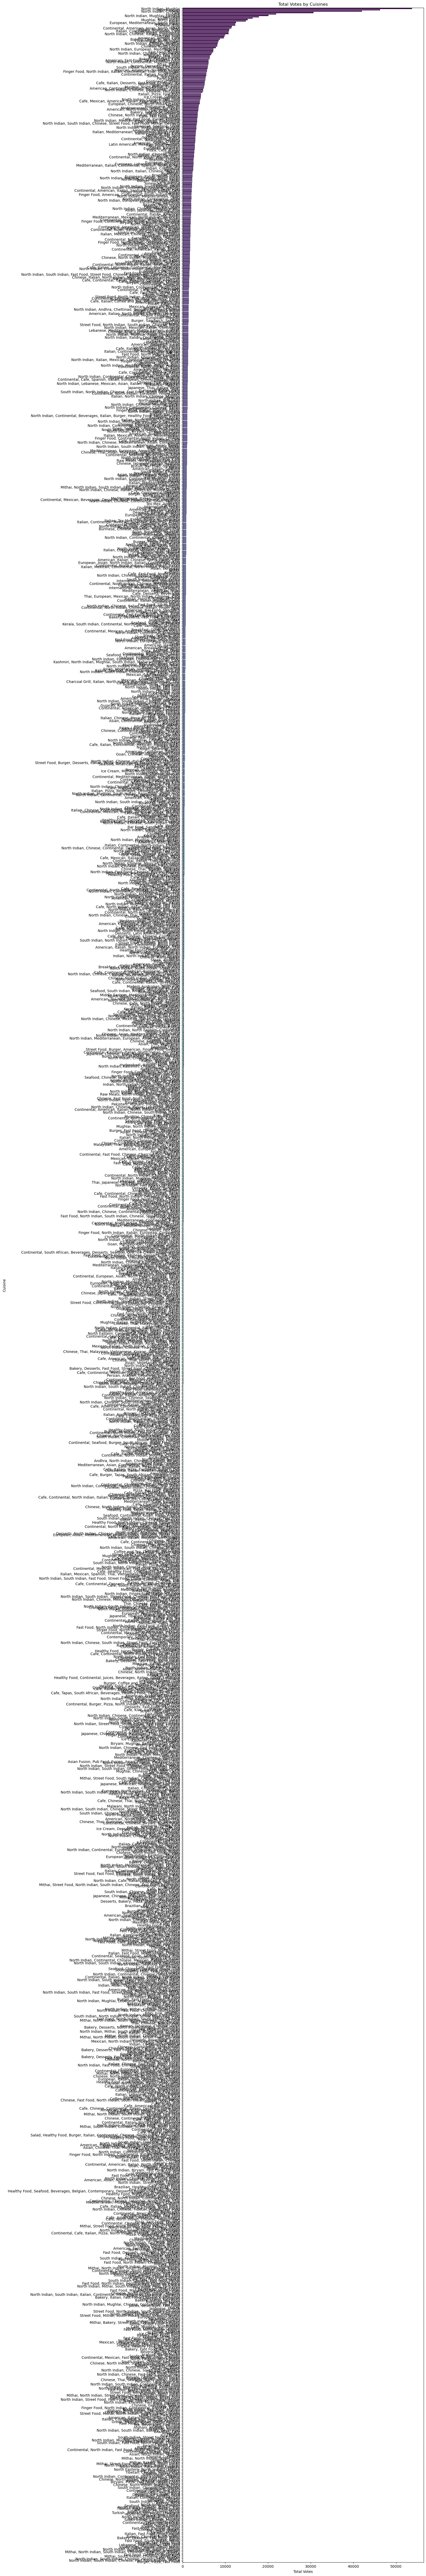

In [38]:
# Ensure columns are in the correct format
df['Cuisines'] = df['Cuisines'].astype(str)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Handle missing values in 'Votes' column
df['Votes'] = df['Votes'].fillna(0)

# Aggregate the number of votes for each cuisine
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Print aggregated votes for each cuisine
print("Total Votes by Cuisines:\n", cuisine_votes)

# Plot the total number of votes for each cuisine
plt.figure(figsize=(12, 128))
sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index, palette='viridis')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.title('Total Votes by Cuisines')
plt.show()